In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [2]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_median.csv')

In [3]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [8]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [9]:
import time

# Début du chrono
start_time = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time = time.time()


Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 1s 13ms/step - loss: 0.7856 - val_loss: 1.1745
Epoch 502/3000
45/45 [==============================] - 1s 14ms/step - loss: 0.8858 - val_loss: 0.7230
Epoch 503/3000
45/45 [==============================] - 1s 16ms/step - loss: 1.0074 - val_loss: 1.0596
Epoch 504/3000
45/45 [==============================] - 1s 15ms/step - loss: 0.8843 - val_loss: 0.6736
Epoch 505/3000
45/45 [==============================] - 1s 16ms/step - loss: 0.7090 - val_loss: 0.4744
Epoch 506/3000
45/45 [==============================] - 1s 15ms/step - loss: 0.9550 - val_loss: 0.9211
Epoch 507/3000
45/45 [==============================] - 1s 16ms/step - loss: 0.8059 - val_loss: 0.6958
Epoch 508/3000
45/45 [==============================] - 1s 13ms/step - loss: 0.7968 - val_loss: 0.8441
Epoch 509/3000
45/45 [==============================] - 0s 10ms/step - loss: 0.8281 - val_loss: 0.6787
Epoch 510/3000
45/45 [===============

In [10]:
# Calcul de la durée d'entraînement en secondes
training_time = end_time - start_time

# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time, "secondes")
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

Le temps d'entraînement est de 2063.402247428894 secondes
12/12 [==============================] - 0s 8ms/step - loss: 0.3325
Mean absolute percentage error: 0.3325406312942505


In [11]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 287ms/step
Predicted WQI: 72.03149


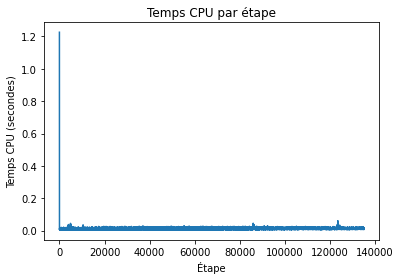

In [12]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le **moyenne**

In [39]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean.csv')

In [40]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [44]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [45]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [46]:
import time

# Début du chrono
start_time = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time = time.time()


Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 0s 10ms/step - loss: 1.6441 - val_loss: 1.8242
Epoch 502/3000
45/45 [==============================] - 0s 10ms/step - loss: 2.3215 - val_loss: 1.8243
Epoch 503/3000
45/45 [==============================] - 1s 12ms/step - loss: 2.4573 - val_loss: 1.9473
Epoch 504/3000
45/45 [==============================] - 1s 13ms/step - loss: 2.0815 - val_loss: 2.7672
Epoch 505/3000
45/45 [==============================] - 1s 13ms/step - loss: 1.7469 - val_loss: 3.3091
Epoch 506/3000
45/45 [==============================] - 1s 12ms/step - loss: 2.3907 - val_loss: 1.7595
Epoch 507/3000
45/45 [==============================] - 1s 13ms/step - loss: 2.5897 - val_loss: 2.8258
Epoch 508/3000
45/45 [==============================] - 1s 12ms/step - loss: 2.4792 - val_loss: 2.6385
Epoch 509/3000
45/45 [==============================] - 0s 10ms/step - loss: 2.3365 - val_loss: 1.8487
Epoch 510/3000
45/45 [===============

In [47]:
# Calcul de la durée d'entraînement en secondes
training_time = end_time - start_time

# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time, "secondes")
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

Le temps d'entraînement est de 1523.1261985301971 secondes
12/12 [==============================] - 0s 3ms/step - loss: 1.6729
Mean absolute percentage error: 1.6728802919387817


In [48]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 187ms/step
Predicted WQI: 73.76755


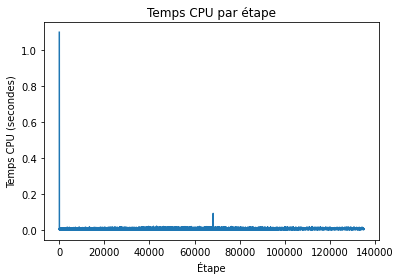

In [49]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le plus **frequent**

In [28]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [29]:

# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [33]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [34]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [36]:
import time

# Début du chrono
start_time = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time = time.time()

Streaming output truncated to the last 5000 lines.
45/45 [==============================] - 0s 9ms/step - loss: 0.3782 - val_loss: 0.2382
Epoch 502/3000
45/45 [==============================] - 0s 9ms/step - loss: 0.3150 - val_loss: 0.6093
Epoch 503/3000
45/45 [==============================] - 0s 9ms/step - loss: 0.6490 - val_loss: 0.4264
Epoch 504/3000
45/45 [==============================] - 1s 12ms/step - loss: 0.3369 - val_loss: 0.1644
Epoch 505/3000
45/45 [==============================] - 1s 12ms/step - loss: 0.4313 - val_loss: 0.5186
Epoch 506/3000
45/45 [==============================] - 1s 13ms/step - loss: 0.4444 - val_loss: 0.4517
Epoch 507/3000
45/45 [==============================] - 0s 10ms/step - loss: 0.4762 - val_loss: 0.3787
Epoch 508/3000
45/45 [==============================] - 0s 11ms/step - loss: 0.3460 - val_loss: 0.3380
Epoch 509/3000
45/45 [==============================] - 1s 12ms/step - loss: 0.3533 - val_loss: 0.6904
Epoch 510/3000
45/45 [==================

In [37]:
# Calcul de la durée d'entraînement en secondes
training_time = end_time - start_time

# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time, "secondes")
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

Le temps d'entraînement est de 1462.07790017128 secondes
12/12 [==============================] - 0s 3ms/step - loss: 0.2977
Mean absolute percentage error: 0.2977014183998108


In [38]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 166ms/step
Predicted WQI: 71.80145


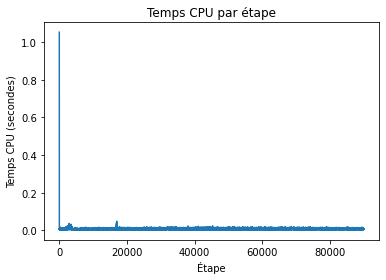

In [14]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [13]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [14]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [18]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [19]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [24]:
import time

# Début du chrono
start_time = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time = time.time()

Streaming output truncated to the last 5000 lines.
42/42 [==============================] - 0s 8ms/step - loss: 0.5563 - val_loss: 0.3589
Epoch 502/3000
42/42 [==============================] - 0s 7ms/step - loss: 0.4028 - val_loss: 0.5402
Epoch 503/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.4481 - val_loss: 0.3923
Epoch 504/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.4338 - val_loss: 0.3223
Epoch 505/3000
42/42 [==============================] - 0s 8ms/step - loss: 0.3898 - val_loss: 0.2672
Epoch 506/3000
42/42 [==============================] - 0s 8ms/step - loss: 0.3629 - val_loss: 0.5007
Epoch 507/3000
42/42 [==============================] - 0s 9ms/step - loss: 0.2828 - val_loss: 0.3901
Epoch 508/3000
42/42 [==============================] - 0s 8ms/step - loss: 0.3080 - val_loss: 0.3159
Epoch 509/3000
42/42 [==============================] - 0s 8ms/step - loss: 0.3421 - val_loss: 0.2910
Epoch 510/3000
42/42 [========================

In [25]:
# Calcul de la durée d'entraînement en secondes
training_time = end_time - start_time

# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time, "secondes")
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

Le temps d'entraînement est de 1342.0285394191742 secondes
11/11 [==============================] - 0s 3ms/step - loss: 0.1320
Mean absolute percentage error: 0.13201290369033813


In [26]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 41ms/step
Predicted WQI: 71.98705


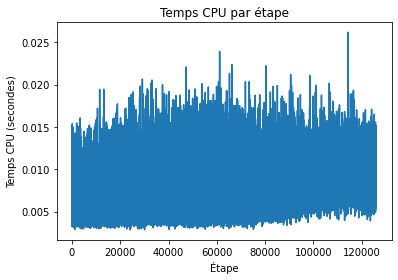

In [27]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()